**DATA DIRI**

Rafi Rachmad Ramadhan\
rafi_rachmad_m04\
rafirachmadramadhan@gmail.com

In [1]:
import pandas as pd
df = pd.read_csv('Emotion_final.csv')
df

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


In [2]:
category = pd.get_dummies(df.Emotion)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='Emotion')
df_baru

,Text,anger,fear,happy,love,sadness,surprise
0,i didnt feel humiliated,0,0,0,0,1,0
1,i can go from feeling so hopeless to so damned...,0,0,0,0,1,0
2,im grabbing a minute to post i feel greedy wrong,1,0,0,0,0,0
3,i am ever feeling nostalgic about the fireplac...,0,0,0,1,0,0
4,i am feeling grouchy,1,0,0,0,0,0
...,...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,0,1,0,0,0,0
21455,Successive state elections have seen the gover...,0,1,0,0,0,0
21456,Vincent was irritated but not dismay,0,1,0,0,0,0
21457,Kendall-Hume turned back to face the dismayed ...,0,1,0,0,0,0


In [3]:
text = df_baru['Text'].values
label = df_baru[['anger', 'fear', 'happy', 'love', 'sadness', 'surprise']].values

In [4]:
from sklearn.model_selection import train_test_split
text_latih, text_test, label_latih, label_test = train_test_split(text, label, test_size=0.2)

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(text_latih) 
tokenizer.fit_on_texts(text_test)
 
sekuens_latih = tokenizer.texts_to_sequences(text_latih)
sekuens_test = tokenizer.texts_to_sequences(text_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [6]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch, logs=None):
    if logs.get('accuracy') > 0.9 and logs.get('val_accuracy') > 0.9:
      print("Training stopped, target reached.")
      self.model.stop_training = True

In [8]:
num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2, 
                    callbacks=[MyCallback()])

Epoch 1/30
537/537 - 7s - loss: 1.3828 - accuracy: 0.4150 - val_loss: 0.9102 - val_accuracy: 0.6505 - 7s/epoch - 13ms/step
Epoch 2/30
537/537 - 3s - loss: 0.6507 - accuracy: 0.7520 - val_loss: 0.5814 - val_accuracy: 0.7873 - 3s/epoch - 6ms/step
Epoch 3/30
537/537 - 3s - loss: 0.3559 - accuracy: 0.8751 - val_loss: 0.4479 - val_accuracy: 0.8544 - 3s/epoch - 6ms/step
Epoch 4/30
537/537 - 3s - loss: 0.2466 - accuracy: 0.9189 - val_loss: 0.4126 - val_accuracy: 0.8637 - 3s/epoch - 6ms/step
Epoch 5/30
537/537 - 3s - loss: 0.1828 - accuracy: 0.9361 - val_loss: 0.4069 - val_accuracy: 0.8723 - 3s/epoch - 6ms/step
Epoch 6/30
537/537 - 3s - loss: 0.1411 - accuracy: 0.9522 - val_loss: 0.4044 - val_accuracy: 0.8749 - 3s/epoch - 6ms/step
Epoch 7/30
537/537 - 3s - loss: 0.1154 - accuracy: 0.9600 - val_loss: 0.4224 - val_accuracy: 0.8812 - 3s/epoch - 6ms/step
Epoch 8/30
537/537 - 3s - loss: 0.0917 - accuracy: 0.9661 - val_loss: 0.4508 - val_accuracy: 0.8907 - 3s/epoch - 6ms/step
Epoch 9/30
537/537 - 3s

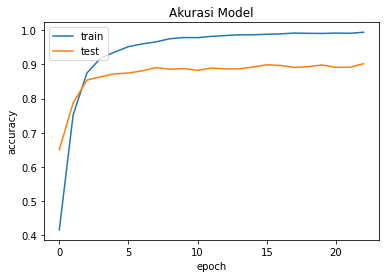

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

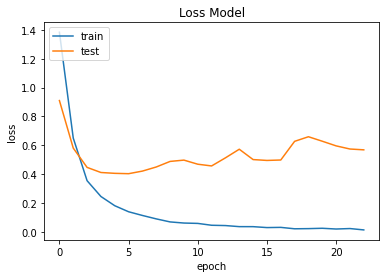

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()